## Starter

In [65]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")


import pandas as pd
import numpy as np
import json

pd.set_option('display.max_columns', None)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
from src.data_helper import generate_player_data

with open('../data/player_details.json') as f:
    data = json.load(f)

df, team_id_to_name = generate_player_data(data)
team_id_to_name_df = pd.DataFrame(list(team_id_to_name.items()), columns=['team_id', 'team_name'])
df.head()
# df.to_csv("../data/cleaned_data.csv", index=False)

id      player_name  age       nationality  height weight    position  \
0  18813  AARON CRESSWELL   36           England  170 cm  66 kg    Defender   
1  44871     AARON HICKEY   23          Scotland  178 cm  72 kg    Defender   
2  44863     AARON HUGHES   45  Northern Ireland  183 cm  70 kg    Defender   
3  24877       AARON HUNT   38           Germany  183 cm  73 kg  Midfielder   
4  18925     AARON LENNON   37           England  165 cm  63 kg  Midfielder   

                                               photo       2024       2023  \
0  https://media.api-sports.io/football/players/1...   West Ham   West Ham   
1  https://media.api-sports.io/football/players/4...  Brentford  Brentford   
2  https://media.api-sports.io/football/players/4...          0          0   
3  https://media.api-sports.io/football/players/2...          0          0   
4  https://media.api-sports.io/football/players/1...          0          0   

        2022          2021              2020                 2019  \
0   West Ham      West Ham          West Ham             West Ham   
1  Brentford       Bologna          Scotland  Heart Of Midlothian   
2          0             0  Northern Ireland                    0   
3          0  Hamburger SV      Hamburger SV         Hamburger SV   
4    Burnley       Burnley       Kayserispor              Burnley   

                  2018              2017              2016              2015  \
0             West Ham          West Ham          West Ham          West Ham   
1  Heart Of Midlothian                 0                 0                 0   
2     Northern Ireland  Northern Ireland  Northern Ireland  Northern Ireland   
3         Hamburger SV      Hamburger SV      Hamburger SV      Hamburger SV   
4              Burnley           Burnley           Everton           Everton   

               2014               2018-2               2017-2  \
0          West Ham              England              England   
1                 0                    0                    0   
2  Northern Ireland  Heart Of Midlothian  Heart Of Midlothian   
3     VfL Wolfsburg                    0                    0   
4           Everton                    0                    0   

                2016-2              2013              2012           2011  \
0              England           Ipswich           Ipswich        Ipswich   
1                    0                 0                 0              0   
2  Heart Of Midlothian  Northern Ireland  Northern Ireland         Fulham   
3                    0           Germany     Werder Bremen  Werder Bremen   
4                    0         Tottenham         Tottenham      Tottenham   

               2010              2009              2008    2023-2    2022-2  \
0          Tranmere          Tranmere          Tranmere         0         0   
1                 0                 0                 0  Scotland  Scotland   
2  Northern Ireland  Northern Ireland  Northern Ireland         0         0   
3           Germany           Germany     Werder Bremen         0         0   
4         Tottenham         Tottenham         Tottenham         0         0   

         2023-3   2020-2              2006              2004  \
0             0        0                 0                 0   
1  Scotland U21  Bologna                 0                 0   
2             0        0  Northern Ireland  Northern Ireland   
3             0        0     Werder Bremen                 0   
4             0        0         Tottenham                 0   

               2003              2002              2000              1999  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2  Northern Ireland  Northern Ireland  Northern Ireland  Northern Ireland   
3                 0                 0                 0                 0   
4             Leeds                 0                 0            

In [67]:
df.describe()

id          age
count    2899.000000  2899.000000
mean    68320.730597    34.338737
std     88089.870958     8.382410
min         1.000000     0.000000
25%      2722.500000    28.000000
50%     30795.000000    34.000000
75%    113983.000000    41.000000
max    495015.000000    65.000000

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Columns: 112 entries, id to 2023-5
dtypes: int64(2), object(110)
memory usage: 2.5+ MB


## Modelling

In [69]:
from sklearn.preprocessing import StandardScaler
from src.data_helper import clean_data

df_cleaned = clean_data(df)
df_cleaned.head()
# df_cleaned = df_cleaned.fillna(0)

# scaler = StandardScaler()
# features_normalized = scaler.fit_transform(df_cleaned)

id  age  height  weight    -2  nationality_0  nationality_Albania  \
0  18813   36   170.0    66.0  0  0          False                False   
1  44871   23   178.0    72.0  0  0          False                False   
2  44863   45   183.0    70.0  0  0          False                False   
3  24877   38   183.0    73.0  0  0          False                False   
4  18925   37   165.0    63.0  0  0          False                False   

   nationality_Algeria  nationality_Andorra  nationality_Argentina  \
0                False                False                  False   
1                False                False                  False   
2                False                False                  False   
3                False                False                  False   
4                False                False                  False   

   nationality_Armenia  nationality_Australia  nationality_Austria  \
0                False                  False                False   
1                False                  False                False   
2                False                  False                False   
3                False                  False                False   
4                False                  False                False   

   nationality_Azerbaijan  nationality_Barbados  nationality_Belarus  \
0                   False                 False                False   
1                   False                 False                False   
2                   False                 False                False   
3                   False                 False                False   
4                   False                 False                False   

   nationality_Belgium  nationality_Benin  nationality_Bosnia and Herzegovina  \
0                False              False                               False   
1                False              False                               False   
2                False              False                               False   
3                False              False                               False   
4                False              False                               False   

   nationality_Botswana  nationality_Brazil  nationality_Bulgaria  \
0                 False               False                 False   
1                 False               False                 False   
2                 False               False                 False   
3                 False               False                 False   
4                 False               False                 False   

   nationality_Burkina Faso  nationality_Burundi  nationality_Cameroon  \
0                     False                False                 False   
1                     False                False                 False   
2                     False                False                 False   
3                     False                False                 False   
4                     False                False                 False   

   nationality_Canada  nationality_Cape Verde  \
0               False                   False   
1               False                   False   
2               False                   False   
3               False                   False   
4               False                   False   

   nationality_Central African Republic  nationality_Chile  \
0                                 False              False   
1                                 False              False   
2                                 False              False   
3                                 False              False   
4                                 False              False   

   nationality_Colombia  nationality_Congo DR  nationality_Costa Rica  \
0                 False                 False                   False   
1                 False                 False                   False   
2                 False                 False 

In [70]:
df_cleaned.shape

(2899, 16454)

In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.utils.tensorboard import SummaryWriter
from datetime import datetime
from src.ae import Autoencoder

features_tensor = torch.tensor(features_normalized, dtype=torch.float32)
dataset = TensorDataset(features_tensor)

# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

train_dataset = dataset

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)


input_dim = features_tensor.shape[1]
latent_dim = 512
model = Autoencoder(input_dim, latent_dim)

feature_weights = torch.tensor([1.0] * input_dim)
feature_weights = feature_weights / feature_weights.sum()  # Normalize weights

# def weighted_mse_loss(output, target, weights):
#     mask = torch.logical_not((target == 0) & (output == 0)).float()
#     diff = (output - target) ** 2
#     weighted_diff = diff * weights * mask  # Apply weights and mask
#     return weighted_diff.sum() / mask.sum()
# criterion = lambda output, target: weighted_mse_loss(output, target, feature_weights)

criterion = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

log_dir = f"../runs/{datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}"
writer = SummaryWriter(log_dir=log_dir)

epochs = 300
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch in train_loader:
        inputs = batch[0]
        latent, outputs = model(inputs)
        loss = criterion(outputs, inputs)
        train_loss += loss.item()
        
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
    
    # model.eval()
    # val_loss = 0.0
    # with torch.no_grad():
    #     for batch in val_loader:
    #         inputs = batch[0]
    #         _, outputs = model(inputs)
    #         loss = criterion(outputs, inputs)
    #         val_loss += loss.item()
    
    writer.add_scalar('Loss/Train', train_loss / len(train_loader), epoch)
    # writer.add_scalar('Loss/Validation', val_loss / len(val_loader), epoch)
    
    if (epoch + 1) % 10 == 0:
        # print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss / len(train_loader):.4f}, Val Loss: {val_loss / len(val_loader):.4f}")
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss / len(train_loader):.4f}")


writer.close()

with torch.no_grad():
    model.eval()
    embeddings = model.encoder(features_tensor).numpy()

print("Embeddings Shape:", embeddings.shape)


Epoch [10/300], Train Loss: 0.2353
Epoch [20/300], Train Loss: 0.1424
Epoch [30/300], Train Loss: 0.1066
Epoch [40/300], Train Loss: 0.0866
Epoch [50/300], Train Loss: 0.0782
Epoch [60/300], Train Loss: 0.0813
Epoch [70/300], Train Loss: 0.0601
Epoch [80/300], Train Loss: 0.0655
Epoch [90/300], Train Loss: 0.0705
Epoch [100/300], Train Loss: 0.0717
Epoch [110/300], Train Loss: 0.0505
Epoch [120/300], Train Loss: 0.0794
Epoch [130/300], Train Loss: 0.0483
Epoch [140/300], Train Loss: 0.0528
Epoch [150/300], Train Loss: 0.0458
Epoch [160/300], Train Loss: 0.0531
Epoch [170/300], Train Loss: 0.0406
Epoch [180/300], Train Loss: 0.0540
Epoch [190/300], Train Loss: 0.0456
Epoch [200/300], Train Loss: 0.0505
Epoch [210/300], Train Loss: 0.0577
Epoch [220/300], Train Loss: 0.0495
Epoch [230/300], Train Loss: 0.0384
Epoch [240/300], Train Loss: 0.0402
Epoch [250/300], Train Loss: 0.0474
Epoch [260/300], Train Loss: 0.0523
Epoch [270/300], Train Loss: 0.0426
Epoch [280/300], Train Loss: 0.0443
E

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity_matrix = cosine_similarity(embeddings)

selected_player_idx = 0
similarity_scores = similarity_matrix[selected_player_idx]

ranked_indices = np.argsort(similarity_scores)[::-1]  # Descending order
ranked_players = df_cleaned.iloc[ranked_indices]
ranked_players[["id", "age", "height", "weight"]]


ValueError: could not convert string to float: 'Galatasaray'

In [76]:
df[df["id"] == 18813]

id      player_name  age nationality  height weight  position  \
0  18813  AARON CRESSWELL   36     England  170 cm  66 kg  Defender   

                                               photo      2024      2023  \
0  https://media.api-sports.io/football/players/1...  West Ham  West Ham   

       2022      2021      2020      2019      2018      2017      2016  \
0  West Ham  West Ham  West Ham  West Ham  West Ham  West Ham  West Ham   

       2015      2014   2018-2   2017-2   2016-2     2013     2012     2011  \
0  West Ham  West Ham  England  England  England  Ipswich  Ipswich  Ipswich   

       2010      2009      2008 2023-2 2022-2 2023-3 2020-2 2006 2004 2003  \
0  Tranmere  Tranmere  Tranmere      0      0      0      0    0    0    0   

  2002 2000 1999 1998 2015-2 2014-2 2013-2 2012-2 2010-2 2009-2 2008-2 2007  \
0    0    0    0    0      0      0      0      0      0      0      0    0   

  2006-2 2005 2004-2 2003-2 2002-2 2024-2 2021-2 2021-3 2019-2 2001 2005-2  \
0      0    0      0      0      0      0      0      0      0    0      0   

  2011-2 2007-2 2025 2024-3 2011-3 2010-3 2017-3 2014-3 2022-3 2026 2012-3  \
0      0      0    0      0      0      0      0      0      0    0      0   

  2008-3 2015-3 2019-3 2013-3 1997 1996    2025-2 2016-3 2009-3 2015-4 2019-4  \
0      0      0      0      0    0    0  0      0      0      0      0      0   

  2020-3 1994 2023-4 1995 2020-4 1992 1990 1988 1986 1984 2007-3 2018-3  \
0      0    0      0    0      0    0    0    0    0    0      0      0   

  2008-4 2018-4 2017-4 2024-4 2011-4 2022-4 1991 1996-2 1993 2001-2 2000-2  \
0      0      0      0      0      0      0    0      0    0      0      0   

  1999-2 1998-2 1997-2 2013-4 2012-4 -2 1992-2 2023-5  
0      0      0      0      0      0  0      0      0

In [85]:
df[df["id"] == 25315]


id             player_name  age nationality  height weight  position  \
2664  25315  THEODOR GEBRE SELASSIE   38     Czechia  181 cm  71 kg  Defender   

                                                  photo 2024            2023  \
2664  https://media.api-sports.io/football/players/2...    0  Slovan Liberec   

                2022            2021           2020           2019  \
2664  Slovan Liberec  Slovan Liberec  Werder Bremen  Werder Bremen   

               2018           2017           2016           2015  \
2664  Werder Bremen  Werder Bremen  Werder Bremen  Werder Bremen   

               2014          2018-2 2017-2          2016-2           2013  \
2664  Werder Bremen  Czech Republic      0  Czech Republic  Werder Bremen   

               2012            2011            2010            2009  \
2664  Werder Bremen  Slovan Liberec  Slovan Liberec  Slovan Liberec   

                2008 2023-2 2022-2 2023-3          2020-2 2006 2004 2003 2002  \
2664  Slovan Liberec      0      0      0  Czech Republic    0    0    0    0   

     2000 1999 1998 2015-2 2014-2 2013-2          2012-2 2010-2 2009-2 2008-2  \
2664    0    0    0      0      0      0  Czech Republic      0      0      0   

              2007 2006-2 2005 2004-2 2003-2 2002-2 2024-2 2021-2 2021-3  \
2664  Slavia Praha      0    0      0      0      0      0      0      0   

     2019-2 2001 2005-2 2011-2 2007-2 2025 2024-3 2011-3 2010-3 2017-3 2014-3  \
2664      0    0      0      0      0    0      0      0      0      0      0   

     2022-3 2026 2012-3 2008-3 2015-3 2019-3 2013-3 1997 1996    2025-2  \
2664      0    0      0      0      0      0      0    0    0  0      0   

     2016-3 2009-3 2015-4 2019-4 2020-3 1994 2023-4 1995 2020-4 1992 1990  \
2664      0      0      0      0      0    0      0    0      0    0    0   

     1988 1986 1984 2007-3 2018-3 2008-4 2018-4 2017-4 2024-4 2011-4 2022-4  \
2664    0    0    0      0      0      0      0      0      0      0      0   

     1991 1996-2 1993 2001-2 2000-2 1999-2 1998-2 1997-2 2013-4 2012-4 -2  \
2664    0      0    0      0      0      0      0      0      0      0  0   

     1992-2 2023-5  
2664      0      0

In [89]:
df_cleaned[df_cleaned["id"] == 25315]

id  age  height  weight    -2  nationality_0  nationality_Albania  \
2664  25315   38   181.0    71.0  0  0          False                False   

      nationality_Algeria  nationality_Andorra  nationality_Argentina  \
2664                False                False                  False   

      nationality_Armenia  nationality_Australia  nationality_Austria  \
2664                False                  False                False   

      nationality_Azerbaijan  nationality_Barbados  nationality_Belarus  \
2664                   False                 False                False   

      nationality_Belgium  nationality_Benin  \
2664                False              False   

      nationality_Bosnia and Herzegovina  nationality_Botswana  \
2664                               False                 False   

      nationality_Brazil  nationality_Bulgaria  nationality_Burkina Faso  \
2664               False                 False                     False   

      nationality_Burundi  nationality_Cameroon  nationality_Canada  \
2664                False                 False               False   

      nationality_Cape Verde  nationality_Central African Republic  \
2664                   False                                 False   

      nationality_Chile  nationality_Colombia  nationality_Congo DR  \
2664              False                 False                 False   

      nationality_Costa Rica  nationality_Croatia  nationality_Curaçao  \
2664                   False                False                False   

      nationality_Czech Republic  nationality_Czechia  \
2664                       False                 True   

      nationality_CÃ´te d'Ivoire  nationality_Côte d'Ivoire  \
2664                       False                      False   

      nationality_Denmark  nationality_Ecuador  nationality_Egypt  \
2664                False                False              False   

      nationality_England  nationality_Estonia  nationality_Finland  \
2664                False                False                False   

      nationality_France  nationality_French Guiana  nationality_Gabon  \
2664               False                      False              False   

      nationality_Gambia  nationality_Georgia  nationality_Germany  \
2664               False                False                False   

      nationality_Ghana  nationality_Gibraltar  nationality_Greece  \
2664              False                  False               False   

      nationality_Guadeloupe  nationality_Guinea  nationality_Honduras  \
2664                   False               False                 False   

      nationality_Hungary  nationality_Iceland  nationality_Indonesia  \
2664                False                False                  False   

      nationality_Iran  nationality_Ireland Republic  nationality_Israel  \
2664             False                         False               False   

      nationality_Italy  nationality_Jamaica  nationality_Japan  \
2664              False                False              False   

      nationality_Kenya  nationality_Korea Republic  nationality_Kosovo  \
2664              False                       False               False   

      nationality_Luxembourg  nationality_Madagascar  nationality_Mali  \
2664                   False                   False             False   

      nationality_Martinique  nationality_Mexico  nationality_Moldova  \
2664                   False               False                False   

      nationality_Montenegro  nationality_Morocco  nationality_Mozambique  \
2664                   False                False                   False   

      nationality_Netherlands  nationality_New Zealand  nationality_Nigeria  \
2664                    False                    False                False   

      nationality_North Macedonia  nationality_Northern Ireland  \
2664                        False                         False   

      nationa

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
player_clusters = kmeans.fit_predict(embeddings)

df_cleaned["cluster"] = player_clusters
print(df_cleaned[["id", "cluster"]])


          id  cluster
0      18813        0
1      44871        0
2      44863        2
3      24877        0
4      18925        0
...      ...      ...
2894    1091        0
2895   89051        0
2896   45838        0
2897    1563        0
2898  115103        0

[2899 rows x 2 columns]


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


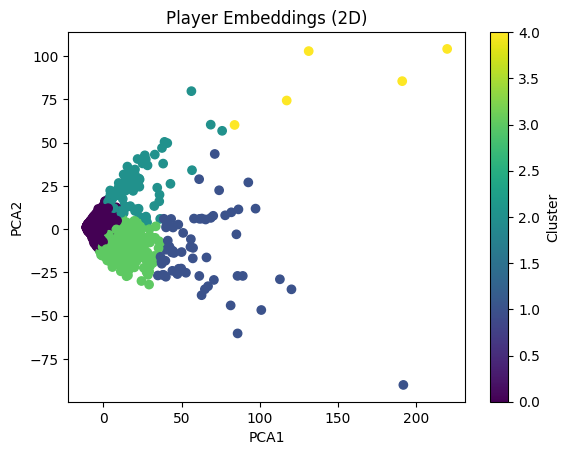

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=player_clusters, cmap="viridis")
plt.title("Player Embeddings (2D)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.colorbar(label="Cluster")
plt.show()
